<p style="font-size:200%;font-weight:bold">Product Similarity</p>

- Author: Wenzhi Ding
- Date: 2022-03-27

This notebook is to compile TNIC data to competition link.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from itertools import combinations
import matplotlib.pyplot as plt

%matplotlib inline

DB = "/home/data/"
ROOT = "/home/team_crypto/2022_esg_peer/"

RD = f"{ROOT}02_rdata/"
WD = f"{ROOT}03_wdata/"

# Read TNIC

In [42]:
df = pd.read_parquet(f'{DB}tnic/tnic3_data.pq')
df.shape
df.head(3)

(23678297, 4)

,year,gvkey1,gvkey2,score
0,1988,1011,3226,0.1498
1,1988,1011,6282,0.0852
2,1988,1011,6734,0.0347


<AxesSubplot:>

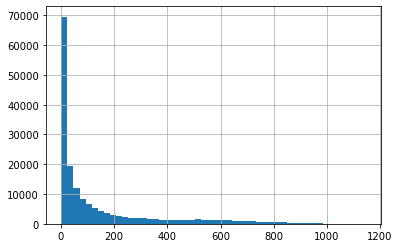

In [5]:
df.groupby(['year', 'gvkey1'])['gvkey2'].nunique().hist(bins=50)

<AxesSubplot:>

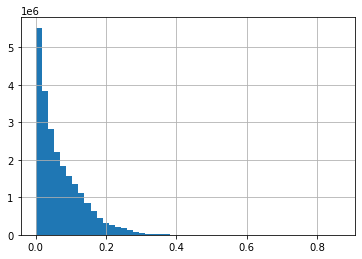

In [14]:
df['score'].hist(bins=50)

In [15]:
gks = set(df['gvkey1']) | set(df['gvkey2'])
len(gks)

17745

In [17]:
gks = ''.join([str(x) + '\n' for x in gks])

In [18]:
with open(f'{WD}1300_tnic_gvkeys.txt', 'w') as f:
    f.write(gks)

107123

In [18]:
cp = pd.read_csv(f'{RD}comp_tnic_ind.csv', engine='pyarrow')
cp.shape
cp.head(3)

(227098, 15)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,conm,curcd,costat,naicsh,sich,gsubind,naics,sic
0,1003,19890131,1988,INDL,C,D,STD,A.A. IMPORTING CO INC,USD,I,442110.0,5712.0,25504040.0,442110,5712
1,1003,19900131,1989,INDL,C,D,STD,A.A. IMPORTING CO INC,USD,I,442110.0,5712.0,25504040.0,442110,5712
2,1004,19880531,1987,INDL,C,D,STD,AAR CORP,USD,A,421860.0,5080.0,20101010.0,423860,5080


In [37]:
cp.loc[cp['conm'].str.contains('FORD'), ['gvkey', 'conm', 'sic']].drop_duplicates()
# cp.loc[cp['gvkey'] == 5073, ['fyear']]

,gvkey,conm,sic
1911,1381,AMERFORD INTERNATIONAL CORP,4731
7981,2390,BRIDGFORD FOODS CORP,2013
14767,3581,CRAWFORD & CO,6411
19511,4367,WEATHERFORD INTL PLC,1381
22432,4839,FORD MOTOR CO,3711
25206,5377,GUILFORD MILLS INC,2250
25696,5465,HANNAFORD BROTHERS CO,5411
26790,5621,CRAWFORD UNITED CORP,3564
42471,8219,OXFORD INDUSTRIES INC,2300
52463,10010,STANFORD TELECOMMUNICATIONS,3663


In [22]:
cp.drop(columns=['datadate', 'indfmt', 'consol', 'popsrc', 'datafmt', 'curcd', 'costat'], inplace=True)
cp.shape
cp.head(3)

(227098, 8)

,gvkey,fyear,conm,naicsh,sich,gsubind,naics,sic
0,1003,1988,A.A. IMPORTING CO INC,442110.0,5712.0,25504040.0,442110,5712
1,1003,1989,A.A. IMPORTING CO INC,442110.0,5712.0,25504040.0,442110,5712
2,1004,1987,AAR CORP,421860.0,5080.0,20101010.0,423860,5080


In [44]:
y, g1, g2, sc = df.loc[df['score'] > 0.2].sample().values[0]
y, g1, g2, sc
cp.loc[(cp['fyear'] == y) & ((cp['gvkey'] == g1) | (cp['gvkey'] == g2))]

(2014.0, 21362.0, 15539.0, 0.2236)

,gvkey,fyear,conm,naicsh,sich,gsubind,naics,sic
89153,15539,2014,PARATEK PHARMACEUTCLS INC,325412.0,2834.0,35202010.0,325412,2834
106288,21362,2014,TOKAI PHARMACEUTICALS INC,325414.0,2836.0,35201010.0,325414,2836


# Corr with FF Industry

In [77]:
ff = pd.read_csv('https://raw.githubusercontent.com/Wenzhi-Ding/FamaFrenchIndustry/main/ff_12ind.csv')
ff.drop(columns=['ff_12ind', 'ff_12ind_desc'], inplace=True)
ff.shape
ff.head(3)

(9900, 2)

,sic,ff_12ind_name
0,100,NoDur
1,101,NoDur
2,102,NoDur


In [78]:
cp2 = cp.loc[:, ['gvkey', 'fyear', 'sic']]
# cp2['sic2'] = cp2['sic'] // 100  # SIC 2 digit is still two granular
# cp2['sic2'].describe()
cp2.head(3)

,gvkey,fyear,sic
0,1003,1988,5712
1,1003,1989,5712
2,1004,1987,5080


In [79]:
cp2 = cp2.merge(ff, on=['sic'], how='left', indicator=True)
cp2['_merge'].value_counts()
cp2.shape
cp2.head(3)

both          227098
left_only          0
right_only         0
Name: _merge, dtype: int64

(227098, 5)

,gvkey,fyear,sic,ff_12ind_name,_merge
0,1003,1988,5712,Shops,both
1,1003,1989,5712,Shops,both
2,1004,1987,5080,Shops,both


In [80]:
cp2.drop(columns=['sic', '_merge'], inplace=True)
cp2.columns = ['gvkey1', 'year', 'ff1']
cp2.head(3)

,gvkey1,year,ff1
0,1003,1988,Shops
1,1003,1989,Shops
2,1004,1987,Shops


In [81]:
m = df.merge(cp2, on=['gvkey1', 'year'], how='left', indicator=True, validate='m:1')
m['_merge'].value_counts()
m.head(3)

both          23537053
left_only       141244
right_only           0
Name: _merge, dtype: int64

,year,gvkey1,gvkey2,score,ff1,_merge
0,1988,1011,3226,0.1498,Telcm,both
1,1988,1011,6282,0.0852,Telcm,both
2,1988,1011,6734,0.0347,Telcm,both


In [82]:
cp2.columns = ['gvkey2', 'year', 'ff2']
m = m.drop(columns=['_merge']).merge(cp2, on=['gvkey2', 'year'], how='left', indicator=True, validate='m:1')
m['_merge'].value_counts()
m.drop(columns=['_merge'], inplace=True)
m.head(3)

both          23537053
left_only       141244
right_only           0
Name: _merge, dtype: int64

,year,gvkey1,gvkey2,score,ff1,ff2
0,1988,1011,3226,0.1498,Telcm,Telcm
1,1988,1011,6282,0.0852,Telcm,Telcm
2,1988,1011,6734,0.0347,Telcm,Telcm


In [83]:
g = m.groupby(['ff1', 'ff2'])['score'].mean().unstack().fillna(0)
g.head()

ff2,BusEq,Chems,Durbl,Enrgy,Hlth,Manuf,Money,NoDur,Other,Shops,Telcm,Utils
ff1,,,,,,,,,,,,
BusEq,0.028966,0.024639,0.025120,0.033253,0.027269,0.023345,0.026849,0.023599,0.026969,0.022444,0.022528,0.025307
Chems,0.024639,0.032921,0.025093,0.027745,0.029080,0.032468,0.039759,0.026158,0.026608,0.030429,0.022302,0.023530
Durbl,0.025120,0.025093,0.036716,0.040661,0.042439,0.023562,0.031644,0.030421,0.057367,0.022138,0.046702,0.025658
Enrgy,0.033253,0.027745,0.040661,0.059475,0.032793,0.032233,0.037011,0.037152,0.031829,0.040630,0.040617,0.039606
Hlth,0.027269,0.029080,0.042439,0.032793,0.066709,0.041065,0.031627,0.035792,0.037619,0.043310,0.030252,0.029080


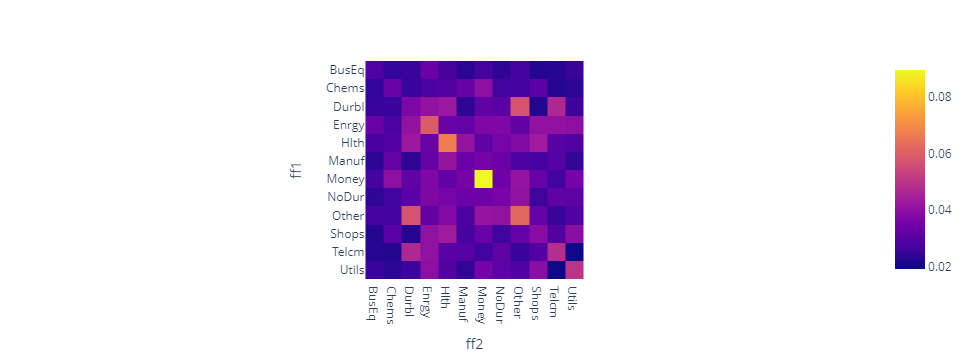

In [84]:
fig = px.imshow(g)
fig.show()

# Check Real Cases

In [159]:
cp.loc[cp['conm'].str.contains('KEURIG'), ['gvkey', 'conm']].drop_duplicates()

,gvkey,conm
135936,28877,KEURIG DR PEPPER INC


In [148]:
df.loc[df['gvkey1'] == 20067]

,year,gvkey1,gvkey2,score


## Score

结论：不适合以某个具体数值划线。

In [15]:
def plot(dct, name='tmp'):
    for a, b in combinations(dct, 2):
        tmp = df.loc[(df['gvkey1'] == a) & (df['gvkey2'] == b)].set_index('year')['score']
        if len(tmp) > 0:
            plt.plot(tmp, label=f'{dct[a]} vs. {dct[b]}', marker='o')
    plt.legend()
    plt.savefig(f'{name}.svg')
    plt.show()

## Rank

结论：排名前75%的看上去还比较相关。

In [7]:
df['rank'] = df.groupby(['gvkey1', 'year'])['score'].rank(pct=True)

In [8]:
def rank(dct):
    df_lst = []
    for a, b in combinations(dct, 2):
        df_lst.append(df.loc[(df['gvkey1'] == a) & (df['gvkey2'] == b)].groupby(['gvkey1', 'gvkey2'])['rank'].agg(['mean', 'median']))
        df_lst.append(df.loc[(df['gvkey1'] == b) & (df['gvkey2'] == a)].groupby(['gvkey1', 'gvkey2'])['rank'].agg(['mean', 'median']))
    tmp = pd.concat(df_lst).reset_index()
    tmp['gvkey1'].replace(dct, inplace=True)
    tmp['gvkey2'].replace(dct, inplace=True)
    return tmp

## Check

In [23]:
df['gvkey1'].replace(179700, 28877, inplace=True)
df['gvkey2'].replace(179700, 28877, inplace=True)

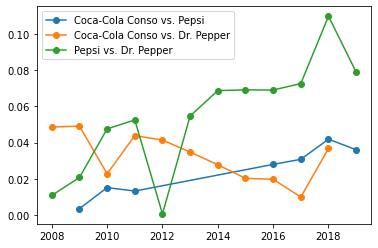

In [24]:
# Beverage
dct = {
    3138: 'Coca-Cola Conso',
    # 25434: 'Starbucks',
    8479: 'Pepsi',
    28877: 'Dr. Pepper',
    # 15273: 'Dr. Pepper/7 Up',
    179700: 'Dr. Pepper Snaple'
}
plot(dct, name='beverage')

In [43]:
df['gvkey1'].replace(5074, 5073, inplace=True)
df['gvkey2'].replace(5074, 5073, inplace=True)

df['gvkey1'].replace(12206, 5073, inplace=True)
df['gvkey2'].replace(12206, 5073, inplace=True)

df['gvkey1'].replace(20355, 5073, inplace=True)
df['gvkey2'].replace(20355, 5073, inplace=True)

df['gvkey1'].replace(20356, 4839, inplace=True)
df['gvkey2'].replace(20356, 4839, inplace=True)

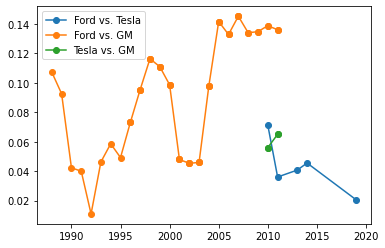

In [44]:
# Car manufacturer
dct = {
    4839: 'Ford',
    184996: 'Tesla',
    5073: 'GM'  # GM明明2021年还有年报，为何数据就停到2012年？
}
plot(dct, name='car')

In [194]:
rank(dct)

,gvkey1,gvkey2,mean,median
0,Ford,Tesla,0.871143,0.925926
1,Tesla,Ford,0.824444,0.800000
2,Ford,GM,0.949191,0.962798
3,GM,Ford,0.844806,0.839744
4,Tesla,GM,0.891667,0.891667
5,GM,Tesla,0.817949,0.817949


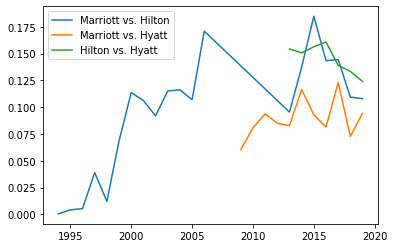

In [195]:
# Hotel
dct = {
    28930: 'Marriott',
    5643: 'Hilton',
    # 20067: 'InterContinental',  # 洲际都没包括？
    183366: 'Hyatt'
}
plot(dct)

In [196]:
rank(dct)

,gvkey1,gvkey2,mean,median
0,Marriott,Hilton,0.814667,1.000000
1,Hilton,Marriott,0.798491,0.959936
2,Marriott,Hyatt,0.903980,0.904762
3,Hyatt,Marriott,0.959841,0.954545
4,Hilton,Hyatt,0.987755,1.000000
5,Hyatt,Hilton,1.000000,1.000000


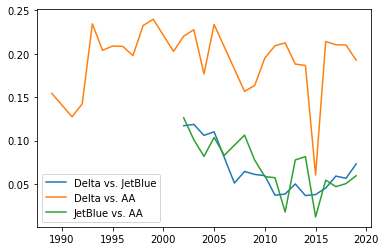

In [197]:
# Airline——这还挺准的，JetBlue跟另外两家不是一个赛道
dct = {
    3851: 'Delta',
    147305: 'JetBlue',
    1045: 'AA'
}
plot(dct)

In [198]:
rank(dct)

,gvkey1,gvkey2,mean,median
0,Delta,JetBlue,0.403753,0.384615
1,JetBlue,Delta,0.584973,0.562500
2,Delta,AA,0.971924,1.000000
3,AA,Delta,0.984636,1.000000
4,JetBlue,AA,0.619918,0.684211
5,AA,JetBlue,0.426292,0.384615


# Fill Missing

有不正常的缺失，比如通用汽车。在合并到主数据集后，考虑用最后一次更新的值来填补缺失。

# Output

In [200]:
df.shape
df.head(3)

(23678297, 5)

,year,gvkey1,gvkey2,score,rank
0,1988,1011,3226,0.1498,0.96
1,1988,1011,6282,0.0852,0.88
2,1988,1011,6734,0.0347,0.48


In [217]:
df2 = df.loc[df['rank'] >= 0.75].copy()  # 可以先简单定义只要两公司在某年成为竞争对手后，就一直为竞争对手
df2.rename(columns={'gvkey1': 'gvkey', 'score': 'tnic_sc', 'rank': 'tnic_rank'}, inplace=True)
df2.groupby(['gvkey', 'year'])['gvkey2'].nunique().describe()  # 中位数12个竞争对手，平均37个竞争对手，最多287个竞争对手（估计是金融业）
df2.shape
df2.sample(1)
df2.to_parquet(f'{WD}1301_tnic_comp_75.pq')

count    160100.000000
mean         37.332879
std          52.564385
min           1.000000
25%           3.000000
50%          12.000000
75%          47.000000
max         287.000000
Name: gvkey2, dtype: float64

(5976994, 5)

,year,gvkey,gvkey2,tnic_sc,tnic_rank
23117944,2019,27235,33272,0.151,0.784264


In [218]:
df2 = df.loc[df['rank'] >= 0.8].copy()  # 可以先简单定义只要两公司在某年成为竞争对手后，就一直为竞争对手
df2.rename(columns={'gvkey1': 'gvkey', 'score': 'tnic_sc', 'rank': 'tnic_rank'}, inplace=True)
df2.groupby(['gvkey', 'year'])['gvkey2'].nunique().describe()  # 中位数10个竞争对手，平均30个竞争对手，最多230个竞争对手（估计是金融业）
df2.shape
df2.sample(1)
df2.to_parquet(f'{WD}1301_tnic_comp_80.pq')

count    160032.000000
mean         29.971524
std          42.047474
min           1.000000
25%           3.000000
50%          10.000000
75%          38.000000
max         230.000000
Name: gvkey2, dtype: float64

(4796403, 5)

,year,gvkey,gvkey2,tnic_sc,tnic_rank
3448582,1993,16727,16809,0.2448,0.850679


In [219]:
df2 = df.loc[df['rank'] >= 0.9].copy()  # 可以先简单定义只要两公司在某年成为竞争对手后，就一直为竞争对手
df2.rename(columns={'gvkey1': 'gvkey', 'score': 'tnic_sc', 'rank': 'tnic_rank'}, inplace=True)
df2.groupby(['gvkey', 'year'])['gvkey2'].nunique().describe()  # 中位数5个竞争对手，平均15个竞争对手，最多115个竞争对手（估计是金融业）
df2.shape
df2.sample(1)
df2.to_parquet(f'{WD}1301_tnic_comp_90.pq')

count    159968.000000
mean         15.268866
std          21.016166
min           1.000000
25%           2.000000
50%           5.000000
75%          19.000000
max         115.000000
Name: gvkey2, dtype: float64

(2442530, 5)

,year,gvkey,gvkey2,tnic_sc,tnic_rank
22678127,2018,61591,164708,0.0775,0.930556
